# Ceneo Analyzer


## Import bibliotek

In [88]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów produktów, o których zostały pobrane opinie

In [89]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

138331381
39562616


## Wczytywanie od użytkowanika kodu produktu, dla którego ma zostać przeprowadzona analiza

In [90]:
product_id = input("Podaj kod produktu: ")

## Wczytywanie do obiektu pandas.DataFrame opinii o produkcie o podanym kodzie

In [98]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.recommendations = opinions.recommendations.apply(lambda r: "Brak rekomendacji" if r is None else r)

In [ ]:
opinions

,opinion_id,author,recommendations,stars,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,3422858,Użytkownik Ceneo,Polecam,5/5,"UWAGA, UWAGA do wszystkich zgłaszających probl...",[],[],57,7,2015-11-17 17:55:59,None
1,3529254,Marcin,Polecam,"4,5/5","Ogólnie spoko, chociaż telefon po wyjęciu z pu...",[],[przycisk home - trzeba mocno naciskać],3,0,2016-01-13 00:44:40,2015-12-27 14:12:05
2,6706897,zedi,Polecam,4/5,Wady Słaby dźwięk z głośnika głównego - z tyłu...,"[ekran nie do zbicia, wyświetlacza: design: ...","[bateria lądująca w godzine 100%, czas pracy n...",0,2,2018-03-14 00:45:39,None
3,3580458,Janek,Polecam,5/5,Smartphone szybki i stabilny. Super ekran doty...,[wyświetlacza: design: żywotność],[],37,16,2016-02-12 11:13:47,2016-01-25 12:30:40
4,3287614,maciej,Polecam,4/5,"Generalnie bardzo dobry smartfon, moim zdaniem...",[funkcjonalność],[],35,14,2015-08-21 14:25:23,None
...,...,...,...,...,...,...,...,...,...,...,...
127,3502307,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-29 18:45:09,None
128,3455136,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-04 22:52:58,None
129,3442558,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-27 13:16:18,None
130,3430751,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-21 13:41:11,None


## Podstawowe statystyki

In [99]:
opinions.count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
average_stars = opinions.stars.mean()

## Histogram częstości poszczególnych ocen produktu

In [100]:
stars_distribution = opinions.stars.value_counts().reindex(list(np.arange(0,5.5,0.5)), fill_value = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

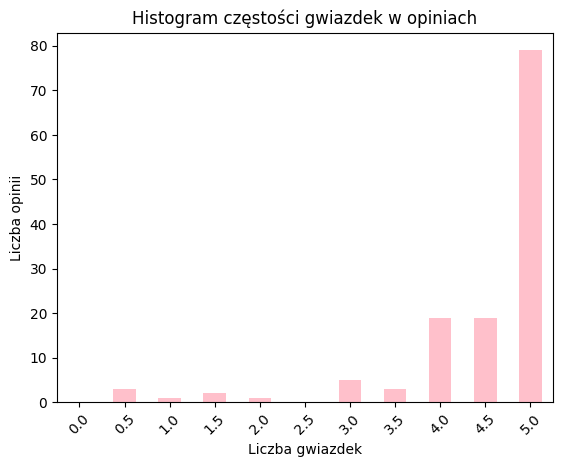

In [101]:
stars_distribution.plot.bar(color = "pink")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation = 45)

## Udział poszczególnych rekomendacji w ogólnej liczbie opinii

In [106]:
recommendations_distribution = opinions.recommendations.value_counts(dropna = False).reindex(["Polecam","Brak rekomendacji","Nie polecam"], fill_value = 0)
recommendations_distribution

recommendations
Polecam              114
Brak rekomendacji     11
Nie polecam            7
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

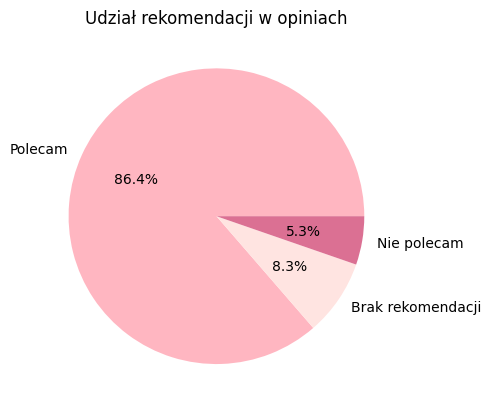

In [107]:
recommendations_distribution.plot.pie(
    colors = ["lightpink","mistyrose","palevioletred"],
    label = "",
    autopct = "%1.1f%%"
)
plt.title("Udział rekomendacji w opiniach")